1. Loading the dataset on colab/any platform
2. Install the relevant libraries
3. Import those libraries
2. Using the dataset


In [ ]:
!pip install pandas numpy matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Digital_marketing.csv")
# Show first rows
print(df.head())

   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  Ema

In [ ]:
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)


Shape: (8000, 20)

Data types:
 CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object


In case of tabular dataset: missing values

In [ ]:
print("\nMissing values:\n", df.isnull().sum())
print("\nUnique counts:\n", df.nunique())
print("\nDuplicate rows:", df.duplicated().sum())



Missing values:
 CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

Unique counts:
 CustomerID             8000
Age                      52
Gender                    2
Income                 7789
CampaignChannel           5
CampaignType              4
AdSpend                8000
ClickThroughRate       8000
ConversionRate         8000
WebsiteVisits            50
PagesPerVisit          8000
TimeOnSite             8000
SocialShares            100
EmailOpens               20
EmailClicks              10
PreviousPurchases        10
Loya

Data Cleaning
1.Percentage of missing values per columns

In [ ]:
(df.isna().sum() / len(df) * 100).round(2)


,0
CustomerID,0.0
Age,0.0
Gender,0.0
Income,0.0
CampaignChannel,0.0
CampaignType,0.0
AdSpend,0.0
ClickThroughRate,0.0
ConversionRate,0.0
WebsiteVisits,0.0


In [ ]:
df = df.drop_duplicates()


Check for inconsistent categories (example: Gender).

In [ ]:
if "Gender" in df.columns:
    print(df["Gender"].unique())


['Female' 'Male']


Standardize Gender labels

In [ ]:
if "Gender" in df.columns:
    df["Gender"] = df["Gender"].replace({"M":"Male", "F":"Female", "male":"Male", "female":"Female"}, inplace=True)
    print(df["Gender"].value_counts())


Series([], Name: count, dtype: int64)


/tmp/ipython-input-2462331166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"] = df["Gender"].replace({"M":"Male", "F":"Female", "male":"Male", "female":"Female"}, inplace=True)


In [ ]:
if "Gender" in df.columns:
    df["Gender"] = df["Gender"].str.strip().str.lower()
    df["Gender"] = df["Gender"].replace({
        "m": "Male",
        "f": "Female",
        "male": "Male",
        "female": "Female"
    })
    print(df["Gender"].value_counts())

Gender
Female    4839
Male      3161
Name: count, dtype: int64


Series([], Name: count, dtype: int64)


Descritive Statistics

In [ ]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


Top 5 most frequent categories for each categorical column().

In [ ]:
for col in df.select_dtypes(include=["object"]):
    print(f"Column: {col}")
    print(df[col].value_counts().head(5))
    print("-"*40)


Column: Gender
Gender
Female    4839
Male      3161
Name: count, dtype: int64
----------------------------------------
Column: CampaignChannel
CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64
----------------------------------------
Column: CampaignType
CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64
----------------------------------------
Column: AdvertisingPlatform
AdvertisingPlatform
IsConfid    8000
Name: count, dtype: int64
----------------------------------------
Column: AdvertisingTool
AdvertisingTool
ToolConfid    8000
Name: count, dtype: int64
----------------------------------------


Visualization

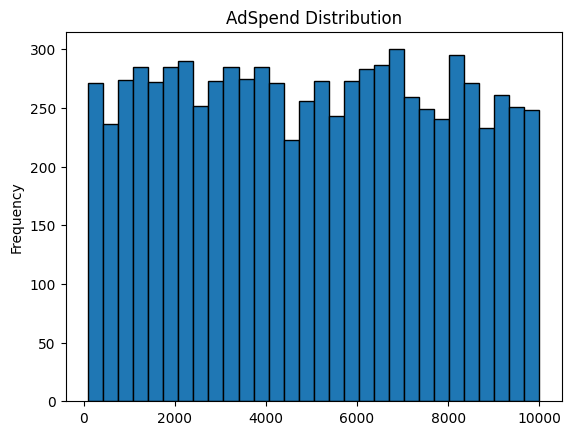

In [ ]:
if "AdSpend" in df.columns:
    df["AdSpend"].plot(kind="hist", bins=30, title="AdSpend Distribution", edgecolor='black')
#put the range in the x-axis

Boxplot of Income

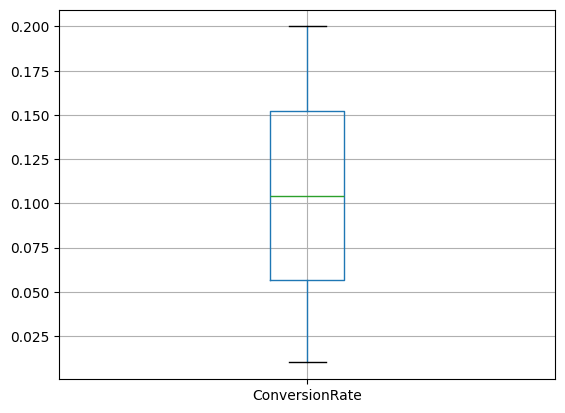

In [ ]:
if "Income" in df.columns:
    df.boxplot(column="ConversionRate")


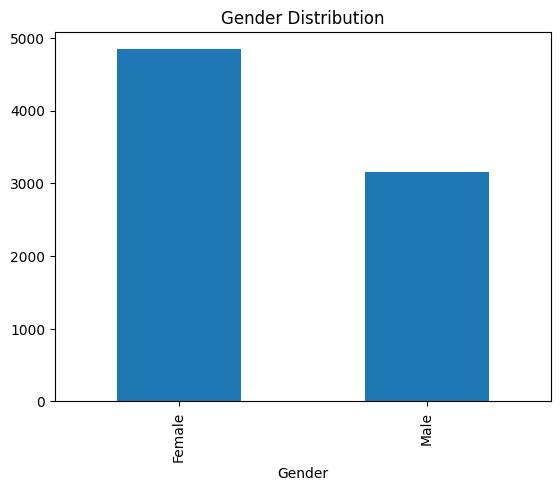

In [ ]:
if "Gender" in df.columns:
    df["Gender"].value_counts().plot(kind="bar", title="Gender Distribution")


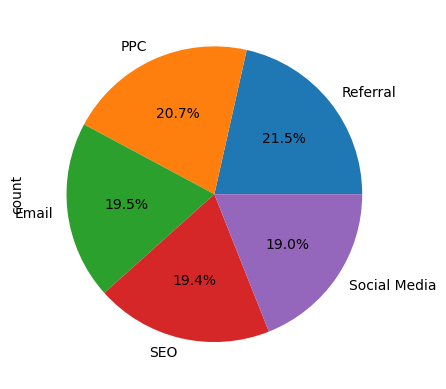

In [ ]:
if "CampaignChannel" in df.columns:
    df["CampaignChannel"].value_counts().plot(kind="pie", autopct='%1.1f%%')


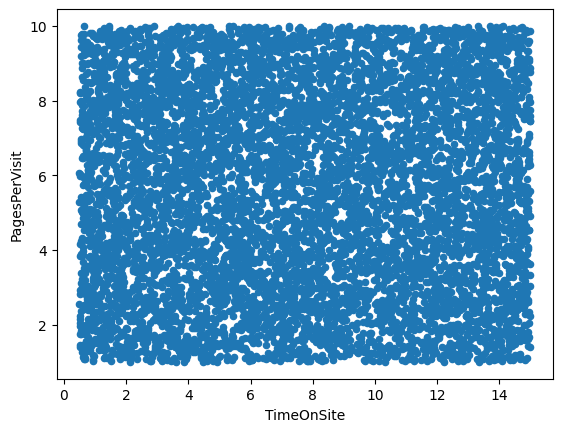

In [ ]:
if "TimeOnSite" in df.columns and "PagesPerVisit" in df.columns:
    df.plot.scatter(x="TimeOnSite", y="PagesPerVisit")


1. Classification
2. Regression
3. Clustering
4. Dimentionality Reduction


In [ ]:
scikit learn-machine learning and data science
Data preprocessing: Standard scaler, onehotencoding
1.

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
X = df[["AdSpend", "Income"]]   # features
y = df["ClickThroughRate"]      # target


In [ ]:
8000: 80-20, 70-30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.007015463190560154
